In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
from sklearn.metrics import hamming_loss
import wandb

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# Multi Layer Perceptron Classification in Python from Scratch

(1143, 13)


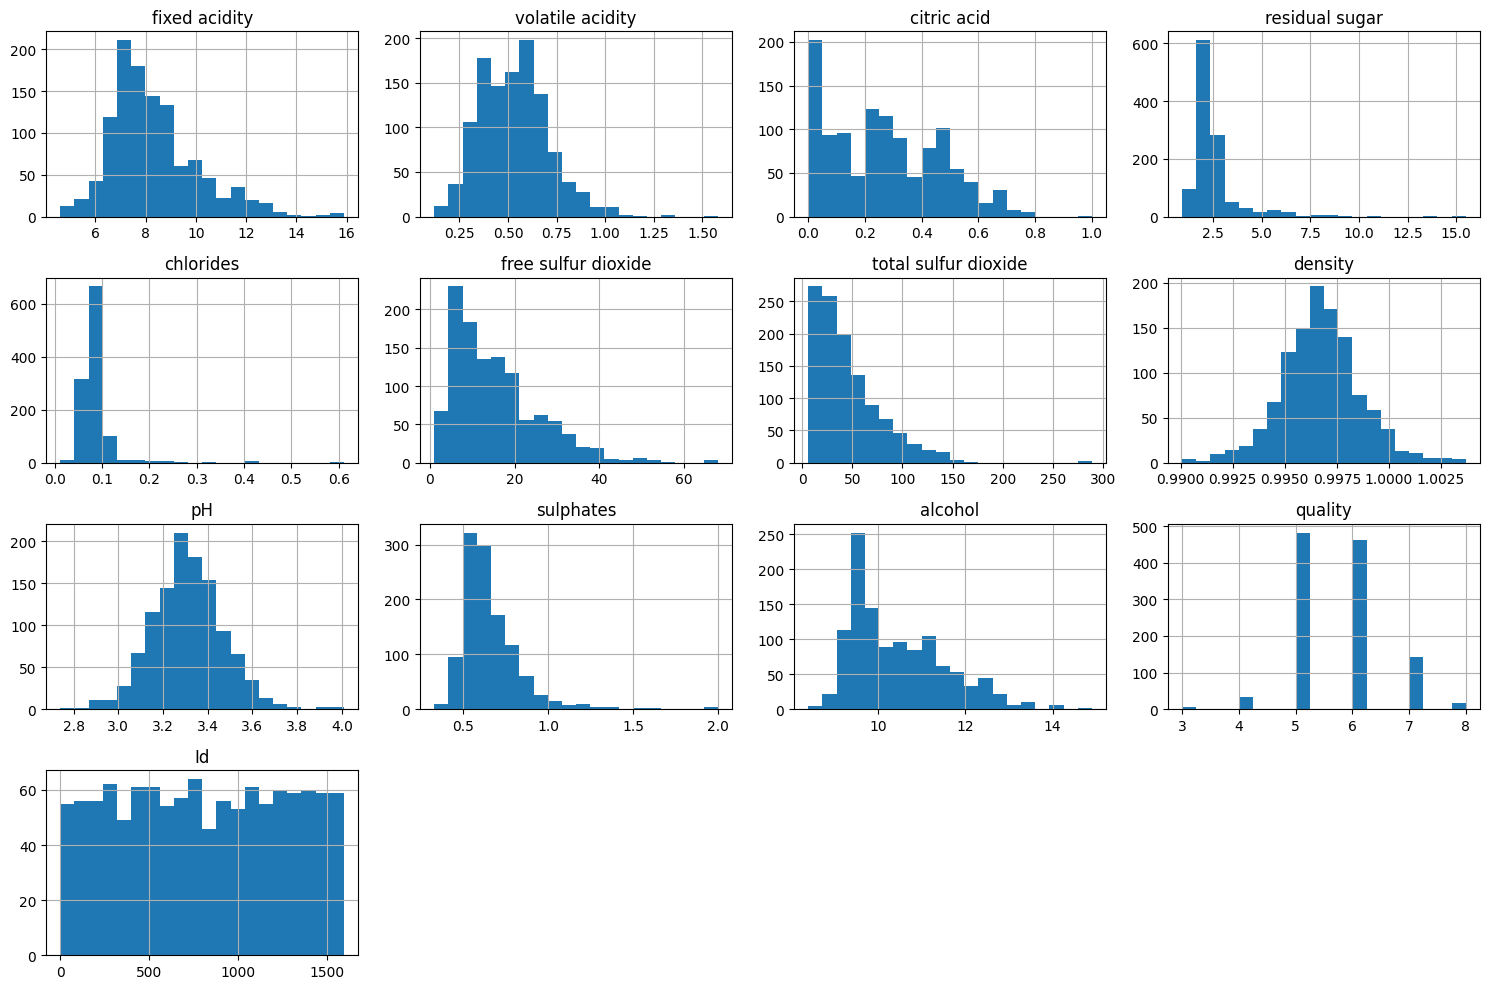

                            mean  standard_deviation         max      min
fixed acidity           8.311111            1.746830    15.90000  4.60000
volatile acidity        0.531339            0.179555     1.58000  0.12000
citric acid             0.268364            0.196600     1.00000  0.00000
residual sugar          2.532152            1.355324    15.50000  0.90000
chlorides               0.086933            0.047247     0.61100  0.01200
free sulfur dioxide    15.615486           10.246001    68.00000  1.00000
total sulfur dioxide   45.914698           32.767787   289.00000  6.00000
density                 0.996730            0.001924     1.00369  0.99007
pH                      3.311015            0.156596     4.01000  2.74000
sulphates               0.657708            0.170324     2.00000  0.33000
alcohol                10.442111            1.081722    14.90000  8.40000
quality                 5.657043            0.805472     8.00000  3.00000
Id                    804.969379      

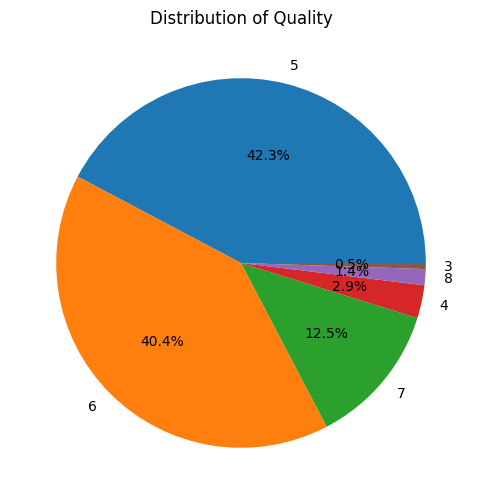

In [2]:
data = pd.read_csv('WineQT.csv')
# print(data)
print(data.shape)
# Describe the dataset
description = data.describe()

# Draw a histogram for each attribute
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()
# fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
tuples = []
for column in data.columns:
    column_data = data[column]
    mean = np.mean(column_data)
    min = np.min(column_data)
    max = np.max(column_data)
    standard_deviation = np.std(column_data)
    tuples.append((mean,standard_deviation,max,min))

# df_metrics = pd.DataFrame(tuples,columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','Id'])
df_metrics = pd.DataFrame(tuples, columns=['mean', 'standard_deviation', 'max', 'min'], index=data.columns)
print(df_metrics)
# Draw a pie chart for the 'quality' attribute
quality_counts = data['quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Quality')
plt.show()

# Multi Layer Perceptron Classification in Python from Scratch

In [3]:
X = data.drop(['quality'], axis=1)  # Remove 'quality' and 'Id' columns from features
y = data['quality']  # Target variable
y = np.array(pd.get_dummies(y).astype(int))
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize and standardize the data
scaler = StandardScaler()
X_train_std = np.array(scaler.fit_transform(X_train))
X_val_std = np.array(scaler.transform(X_val))
X_test_std = np.array(scaler.transform(X_test))



min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_val_norm = min_max_scaler.transform(X_val)
X_test_norm = min_max_scaler.transform(X_test)

In [4]:
import wandb
wandb.login()
wandb.init(project="MultiLayer-Perceptron-Classification")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: rohitgowlapalli01. Use `wandb login --relogin` to force relogin


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epoch,▁▃▅▆██
Loss,█▅▄▂▁▁
Epoch,5000
Loss,0.96361


Initial Loss 3.6535756753070365
Iteration 250: loss = 1.240288
Iteration 500: loss = 1.103343
Iteration 750: loss = 1.062869
Iteration 1000: loss = 1.043245
Iteration 1250: loss = 1.031214
Iteration 1500: loss = 1.022730
Iteration 1750: loss = 1.016157
Iteration 2000: loss = 1.010702
Iteration 2250: loss = 1.005933
Iteration 2500: loss = 1.001595
Iteration 2750: loss = 0.997527
Iteration 3000: loss = 0.993622
Iteration 3250: loss = 0.989809
Iteration 3500: loss = 0.986039
Iteration 3750: loss = 0.982280
Iteration 4000: loss = 0.978516
Iteration 4250: loss = 0.974747
Iteration 4500: loss = 0.970987
Iteration 4750: loss = 0.967265
Iteration 5000: loss = 0.963613
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 0.963613


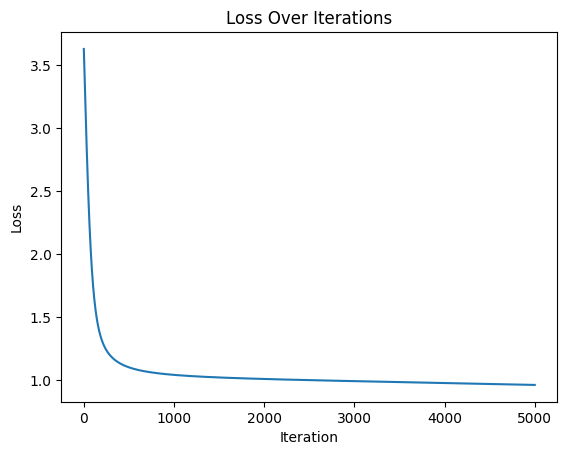

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class MultiLayerPerceptronClassification:
    def __init__(self, input_layer_size, num_hidden_layers, hidden_layer_size, output_layer_size, learning_rate=0.001, activation_type='sigmoid', optimizer_type='batch',max_iterations=10000):
        self.learning_rate = learning_rate
        self.input_layer_size = input_layer_size
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size
        self.activation_type = activation_type
        self.optimizer_type = optimizer_type
        self.weights = self.initialize_weights()
        self.yHat = None
        self.activation_function = self.sigmoid
        self.activation_prime_function = self.sigmoid_prime
        self.max_iterations = max_iterations
        self.train_function = self.train_mini_batch
        self.wandlog = False

    def initialize_weights(self):
        weights = []
        layer_sizes = [self.input_layer_size] + [self.hidden_layer_size] * self.num_hidden_layers + [self.output_layer_size]
        for i in range(1, len(layer_sizes)):
            weights.append(np.random.randn(layer_sizes[i - 1], layer_sizes[i]))
        return weights

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_prime(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)

    def tanh(self, z):
        return np.tanh(z)

    def tanh_prime(self, z):
        return 1 - np.square(np.tanh(z))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_prime(self, z):
        return (z > 0).astype(int)

    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_activation_type(self, activation_type):
        self.activation_type = activation_type
        self.set_activation_function()

    def set_optimizer_type(self, optimizer_type):
        self.optimizer_type = optimizer_type
        self.set_train_function()

    def set_activation_function(self):
        if self.activation_type == 'sigmoid':
            self.activation_function = self.sigmoid
            self.activation_prime_function = self.sigmoid_prime
        elif self.activation_type == 'relu':
            self.activation_function = self.relu
            self.activation_prime_function = self.relu_prime
        elif self.activation_type == 'tanh':
            self.activation_function = self.tanh
            self.activation_prime_function = self.tanh_prime

    def set_train_function(self):
        if self.optimizer_type == 'SGD':
            self.train_function = self.train_sgd
        elif self.optimizer_type == 'mini':
            self.train_function = self.train_mini_batch
        elif self.optimizer_type == 'batch':
            self.train_function = self.train_batch

    def set_hidden_layers(self,num_hidden_layers,hidden_layer_size):
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.weights = self.initialize_weights()

    def set_epochs(self,epochs):
        self.max_iterations = epochs

    def set_wandb(self,state):
        self.wandlog = state

    def forward_propagation(self, X):
        A = [X]
        Z = []
        for layer in range(0, self.num_hidden_layers):
            z = np.dot(A[layer], self.weights[layer])
            a = self.activation_function(z)
            Z.append(z)
            A.append(a)
        z = np.dot(A[self.num_hidden_layers],self.weights[self.num_hidden_layers])
        Z.append(z)
        self.yHat = self.softmax(Z[-1])
        A.append(self.yHat)
        self.activations = A
        self.weighted_sums = Z
        return self.yHat

    def backward_propagation(self, x, y):
        m = x.shape[0]
        output_error = np.multiply((self.activations[-1] - y),self.sigmoid_prime(self.weighted_sums[-1]))
        deltas = [output_error]
        for i in reversed(range(self.num_hidden_layers)):
            error = deltas[-1].dot(self.weights[i + 1].T)
            delta = error*self.activation_prime_function(self.weighted_sums[i])
            deltas.append(delta)
        deltas = list(reversed(deltas))
        gradients = []
        for i in range(self.num_hidden_layers + 1):
            gradient = self.activations[i].T.dot(deltas[i])
            gradients.append(gradient)
        return gradients
    

    def softmax(self, z):
        return np.exp(z - np.max(z)) / np.exp(z - np.max(z)).sum(axis=1, keepdims=True)
    
    def costFunction(self, X, y):
        self.y_Hat = self.forward_propagation(X)
        J = -np.sum(y*np.log(self.y_Hat))/len(X)
        return J

    def get_params(self):
        params = []
        for weight_matrix in self.weights:
            params.append(weight_matrix.ravel())
        return np.concatenate(params)

    def set_params(self, params):
        param_start = 0
        for i in range(len(self.weights)):
            weight_shape = self.weights[i].shape
            weight_size = weight_shape[0] * weight_shape[1]
            self.weights[i] = params[param_start:param_start + weight_size].reshape(weight_shape)
            param_start += weight_size

    def compute_gradients(self, X, y):
        self.forward_propagation(X)
        gradients = self.backward_propagation(X, y)
        gradient_params = []
        for weight_gradient in gradients:
            gradient_params.append(weight_gradient.ravel())
        return np.concatenate(gradient_params)

    def train_batch(self, X, y, learning_rate=0.01, max_iterations=10000,show=False):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        loss = self.costFunction(X, y)
        print('Initial Loss',loss)
        # wandb.log({"Batch-loss": loss})
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (loss > 1e-5) and (k < maxiter):
            gradients = self.compute_gradients(X, y)
            loss = self.costFunction(X, y)
            self.J.append(loss)
            self.set_params(self.get_params() - lr * gradients)
            k += 1
            if k % 250 == 0 and show==True:
                print("Epoch %d: loss = %f" % (k, loss))
                wandb.log({"Epoch":k,"Loss":loss})
        print("Operation Batch GD terminated successfully.")
        print("---------Iterations: %d" % k)
        print("---------Final loss function: %f" % loss)
        if show==True:
            wandb.log({"Epoch":k,"Loss":loss})
            self.plot_loss()
        return loss
    
    def train_sgd(self, X, y,learning_rate=0.01,max_iterations=10000,show=False):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        for epoch in range(max_iterations):
                np.random.seed(42)
                idx = np.random.randint(len(X))
                np.random.seed(27)
                loss = self.costFunction(X[idx:idx+1],y[idx:idx+1])
                self.J.append(loss)
                gradients = self.compute_gradients(X[idx:idx+1], y[idx:idx+1])
                self.set_params(self.get_params() - self.learning_rate * gradients)
                if (epoch % 250 == 0) and show==True:
                    print("Epoch %d: loss = %f" % (epoch, loss))
                    wandb.log({"Epoch":epoch,"Loss":loss})
        print("Operation SGD terminated successfully.")
        if show==True:
            wandb.log({"Epoch":max_iterations,"Loss":loss})
            self.plot_loss()
        return loss
    
    def train_mini_batch(self, X, y, learning_rate=0.01, max_iterations=10000, batch_size=32,show=False):
        self.J = []
        self.set_epochs(max_iterations)
        self.set_learning_rate(learning_rate)
        loss = self.costFunction(X, y)
        print('Initial Loss', loss)
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (loss > 1e-5) and (k < maxiter):
            np.random.seed(27)
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            for j in range(0, len(X), batch_size):
                batch_indices = indices[j:j+batch_size]
                gradients = self.compute_gradients(X[batch_indices], y[batch_indices])
                self.set_params(self.get_params() - lr * gradients)
            k += 1
            loss = self.costFunction(X, y)
            self.J.append(loss)
            if k % 250 == 0 and show==True:
                wandb.log({"Epoch":k,"Loss":loss})
                print("Iteration %d: loss = %f" % (k, loss))
        print("Operation terminated successfully.")
        print("         Iterations: %d" % k)
        print("         Final loss function: %f" % loss)
        if show == True:
            wandb.log({"Epoch":k,"Loss":loss})
            self.plot_loss()
        return loss

    def plot_loss(self):
        if not self.J:
            print("Loss array is empty")
        else:
            plt.plot(self.J)
            plt.title('Loss Over Iterations')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()

    def predict(self, X):
        yHat = self.forward_propagation(X)
        binary_predictions = np.zeros_like(yHat)
        binary_predictions[np.arange(len(yHat)), yHat.argmax(axis=1)] = 1
        return binary_predictions


LR = 0.0001
Max_iterations = 5000
np.random.seed(27)
NN = MultiLayerPerceptronClassification(input_layer_size=12, num_hidden_layers=1, hidden_layer_size=18,output_layer_size=6, learning_rate=LR, activation_type='sigmoid', optimizer_type='mini')
wandb.init(project="MLP-Classification-Train")
loss = NN.train_function(X=X_train_std, y=y_train, learning_rate=LR, max_iterations=Max_iterations,show=True)

In [9]:
# Check wandb Logging
y_pred = NN.predict(X_val_std)
print('------------------------------------')
validation_set_accuracy = accuracy_score(y_val,y_pred)
wandb.log({"Loss": loss,"validation_set_accuracy": validation_set_accuracy})
print("Classification Report on Validation Dataset:")
# print('Accuracy:',accuracy_score(y_val,y_pred))
# print('Recall:',recall_score(y_val,y_pred,average='macro',zero_division=0))
# print('Precision:',precision_score(y_val,y_pred,average='macro',zero_division=0))
# print('F1_macro_score:',f1_score(y_val,y_pred,average='macro',zero_division=0))
# print('F1_micro_score:',f1_score(y_val,y_pred,average='micro',zero_division=0))
tuples = []
tuples.append((accuracy_score(y_val,y_pred),recall_score(y_val,y_pred,average='macro',zero_division=0),precision_score(y_val,y_pred,average='macro',zero_division=0),f1_score(y_val,y_pred,average='macro',zero_division=0),f1_score(y_val,y_pred,average='micro',zero_division=0)))
filtered_df = pd.DataFrame(tuples, columns=['Accuracy', 'Recall', 'Precision', 'F1_macro','F1_micro'])
print(filtered_df.to_string(index=False))
print('------------------------------------')
y_pred = NN.predict(X_train_std)
training_set_accuracy = accuracy_score(y_train,y_pred)
wandb.log({"Loss": loss,"training_set_accuracy": training_set_accuracy})
print("Classification Report on Training Dataset:")
# print('Accuracy:',accuracy_score(y_train,y_pred))
# print('Recall:',recall_score(y_train,y_pred,average='macro',zero_division=0))
# print('Precision:',precision_score(y_train,y_pred,average='macro',zero_division=0))
# print('F1_macro_score:',f1_score(y_train,y_pred,average='macro',zero_division=0))
# print('F1_micro_score:',f1_score(y_train,y_pred,average='micro',zero_division=0))
tuples = []
tuples.append((accuracy_score(y_train,y_pred),recall_score(y_train,y_pred,average='macro',zero_division=0),precision_score(y_train,y_pred,average='macro',zero_division=0),f1_score(y_train,y_pred,average='macro',zero_division=0),f1_score(y_train,y_pred,average='micro',zero_division=0)))
filtered_df = pd.DataFrame(tuples, columns=['Accuracy', 'Recall', 'Precision', 'F1_macro','F1_micro'])
print(filtered_df.to_string(index=False))
print('------------------------------------')
wandb.finish()

------------------------------------
Classification Report on Validation Dataset:
 Accuracy   Recall  Precision  F1_macro  F1_micro
 0.624454 0.275568   0.318343  0.274576  0.624454
------------------------------------
Classification Report on Training Dataset:
 Accuracy   Recall  Precision  F1_macro  F1_micro
  0.60292 0.276965   0.367371    0.2832   0.60292
------------------------------------


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇███
Loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
training_set_accuracy,▁
validation_set_accuracy,▁
Epoch,5000
Loss,0.96361
training_set_accuracy,0.60292
validation_set_accuracy,0.62445


# Model Training & Hyperparameter Tuning using W&B

In [39]:
LR = 0.0001
Max_iterations = 5000
activation_functions = ['sigmoid', 'tanh', 'relu']
optimizers = ['SGD', 'batch', 'mini']
results = []
model = MultiLayerPerceptronClassification(input_layer_size=12, num_hidden_layers=1, hidden_layer_size=18, output_layer_size=6, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
for activation in activation_functions:
    for optimizer in optimizers:
        np.random.seed(27)  # Set a random seed for reproducibility
        model.set_activation_type(activation)
        model.set_optimizer_type(optimizer)
        loss = model.train_function(X=X_train_std, y=y_train, learning_rate=LR, max_iterations=Max_iterations)
        y_pred = model.predict(X_val_std)
        accuracy = accuracy_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred, average='weighted',zero_division=0)
        precision = precision_score(y_val, y_pred, average='weighted',zero_division=0)
        f1 = f1_score(y_val, y_pred, average='weighted',zero_division=0)
        # results[(activation, optimizer)] = (loss,accuracy, recall, precision, f1)
        result = {
            'Activation': activation,
            'Optimizer': optimizer,
            'Accuracy': accuracy,
            'Recall': recall,
            'Precision': precision,
            'F1 Score': f1
        }
        results.append(result)

df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
# Print the DataFrame
print(df.to_string(index=False))

Initial Loss 3.7701013080856636
Initial Loss 0.9696099459464895
Initial Loss 2.565218794037164
Initial Loss 1.5584606003894101
Initial Loss 2.2580879124240516
Initial Loss 2.206922897056921
  Activation Optimizer  Accuracy    Recall  Precision  F1 Score
0    sigmoid      mini  0.637555  0.637555   0.602381  0.615587
1    sigmoid     batch  0.615721  0.615721   0.583192  0.595429
2       relu       SGD  0.602620  0.602620   0.567584  0.580652
3       relu      mini  0.589520  0.589520   0.563523  0.574730
4       relu     batch  0.576419  0.576419   0.555000  0.562411
5       tanh      mini  0.506550  0.506550   0.588704  0.529951
6       tanh     batch  0.497817  0.497817   0.614976  0.530858
7       tanh       SGD  0.327511  0.327511   0.696891  0.377160
8    sigmoid       SGD  0.100437  0.100437   0.243808  0.122202


In [7]:
import wandb
wandb.init(project="MLP-Classification-Activation")
LR = 0.0001
Max_iterations = 5000
activation_functions = ['sigmoid', 'tanh', 'relu']
optimizers = ['SGD', 'batch', 'mini']
results = []
model = MultiLayerPerceptronClassification(input_layer_size=12, num_hidden_layers=1, hidden_layer_size=18, output_layer_size=6, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
sweep_config = {
    "method": "grid",
    "name": "MLP-Classification-Activation",
    "metric": {"goal": "maximize", "name": "Accuracy"},
    "parameters": {
        "activation": {"values": ['sigmoid', 'tanh', 'relu']},
        "optimizer": {"values": ['SGD', 'batch', 'mini']},
    },
}
sweep_id = wandb.sweep(sweep_config, project="MLP-Classification-Activation")
def train():
    wandb.init(project="MLP-Classification-Activation")
    config = wandb.config
    activation = config.activation
    optimizer = config.optimizer
    np.random.seed(27)  
    model.set_activation_type(activation)
    model.set_optimizer_type(optimizer)
    loss = model.train_function(X=X_train_std, y=y_train, learning_rate=LR, max_iterations=Max_iterations)
    y_pred = model.predict(X_val_std)
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='weighted',zero_division=0)
    precision = precision_score(y_val, y_pred, average='weighted',zero_division=0)
    f1 = f1_score(y_val, y_pred, average='weighted',zero_division=0)
    # results[(activation, optimizer)] = (loss,accuracy, recall, precision, f1)
    result = {
        'Activation': activation,
        'Optimizer': optimizer,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    }
    results.append(result)
    wandb.log({"Activation": activation, "Optimizer": optimizer,"Accuracy": accuracy,"Recall": recall,"Precision": precision,"F1 Score": f1})

# Run the sweep
wandb.agent(sweep_id, function=train)
df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
# Print the DataFrame
print(df.to_string(index=False))
wandb.finish()

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: msq6x9mm
Sweep URL: https://wandb.ai/rohitgowlapalli01/MLP-Classification-Activation/sweeps/msq6x9mm
<IPython.core.display.HTML object>


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


wandb: Agent Starting Run: jd1myvt3 with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.


Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
Exception in thread IntMsgThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 267, in check_network_status
        self._target(*self._args, **self._kwargs)self.run()    

self._loop_check_status(  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 285, in check_stop_status
  File "/usr/lib/python3.8/threading.py", line 870, in run

  File "/h

Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.34498
Activation,sigmoid
F1 Score,0.24963
Optimizer,SGD
Precision,0.19657
Recall,0.34498


wandb: Agent Starting Run: kv45ookj with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 4.19857107680154
Operation Batch GD terminated successfully.
---------Iterations: 5000
---------Final loss function: 1.376109


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.43231
Activation,sigmoid
F1 Score,0.34187
Optimizer,batch
Precision,0.40319
Recall,0.43231


wandb: Agent Starting Run: 03tvcpdq with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 1.376079823759663
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.275800


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.41485
Activation,sigmoid
F1 Score,0.3324
Optimizer,mini
Precision,0.40809
Recall,0.41485


wandb: Agent Starting Run: sdv7tsif with config:
wandb: 	activation: tanh
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.15721
Activation,tanh
F1 Score,0.22378
Optimizer,SGD
Precision,0.46173
Recall,0.15721


wandb: Agent Starting Run: 4jdcg7i0 with config:
wandb: 	activation: tanh
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 4.010170608022962
Operation Batch GD terminated successfully.
---------Iterations: 5000
---------Final loss function: 1.784068


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.41485
Activation,tanh
F1 Score,0.45308
Optimizer,batch
Precision,0.56764
Recall,0.41485


wandb: Agent Starting Run: gxbpzdm6 with config:
wandb: 	activation: tanh
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 1.7840639821030764
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.795867


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.42358
Activation,tanh
F1 Score,0.46649
Optimizer,mini
Precision,0.55658
Recall,0.42358


wandb: Agent Starting Run: csqwvvh4 with config:
wandb: 	activation: relu
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Operation SGD terminated successfully.


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.54585
Activation,relu
F1 Score,0.50765
Optimizer,SGD
Precision,0.49053
Recall,0.54585


wandb: Agent Starting Run: kjkll65l with config:
wandb: 	activation: relu
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.4579968764161544
Operation Batch GD terminated successfully.
---------Iterations: 5000
---------Final loss function: 2.864786


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.53275
Activation,relu
F1 Score,0.50415
Optimizer,batch
Precision,0.49009
Recall,0.53275


wandb: Agent Starting Run: nsisn01l with config:
wandb: 	activation: relu
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 2.8647656960730257
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 2.816554


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.55022
Activation,relu
F1 Score,0.52448
Optimizer,mini
Precision,0.51038
Recall,0.55022


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Activation Optimizer  Accuracy   Recall  Precision  F1 Score
      relu      mini  0.550218 0.550218   0.510376  0.524482
      relu       SGD  0.545852 0.545852   0.490533  0.507648
      relu     batch  0.532751 0.532751   0.490088  0.504146
   sigmoid     batch  0.432314 0.432314   0.403191  0.341871
      tanh      mini  0.423581 0.423581   0.556583  0.466487
   sigmoid      mini  0.414847 0.414847   0.408093  0.332403
      tanh     batch  0.414847 0.414847   0.567638  0.453076
   sigmoid       SGD  0.344978 0.344978   0.196566  0.249625
      tanh       SGD  0.157205 0.157205   0.461725  0.223779


In [8]:
LR = 0.0001
Max_iterations = 5000
learning_rates = [0.001, 0.01, 0.1]
epochs = [1000, 5000, 10000]
hidden_layer_neurons = [[1, 18], [2, 18], [3, 18]]
results = []
model = MultiLayerPerceptronClassification(input_layer_size=12,num_hidden_layers=3,hidden_layer_size=3,output_layer_size=6,learning_rate=LR,max_iterations=Max_iterations)
model.set_activation_type('sigmoid')
model.set_optimizer_type('mini')
for rate in learning_rates:
    for epoch in epochs:
        for hln in hidden_layer_neurons:
            np.random.seed(27)
            model.set_learning_rate(rate)
            model.set_epochs(epoch)
            model.set_hidden_layers(num_hidden_layers=hln[0],hidden_layer_size=hln[1])
            loss = model.train_function(X_train_std, y_train, learning_rate=rate, max_iterations=epoch)
            y_pred = model.predict(X_val_std)
            accuracy = accuracy_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred, average='macro',zero_division=0)
            precision = precision_score(y_val, y_pred, average='macro',zero_division=0)
            f1 = f1_score(y_val, y_pred, average='macro',zero_division=0)
            results.append({
                'Learning Rate': rate,
                'Epochs': epoch,
                'Hidden Layer Neurons': hln[0]*hln[1],
                'Loss':loss,
                'Accuracy': accuracy,
                'Recall': recall,
                'Precision': precision,
                'F1 Score': f1
            })
df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
print("Hyperparameter Tuning Results:")
print(df.to_string(index=False))
best_params = df.iloc[0].to_dict()
print("\nBest Model Parameters:")
print(best_params)


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 0.924339
Initial Loss 3.481831663987049
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 1.024104
Initial Loss 2.105615310914648


KeyboardInterrupt: 

In [5]:
import wandb
wandb.init(project="MLP-Classification-Epoch")
LR = 0.0001
Max_iterations = 5000
learning_rates = [0.001, 0.01, 0.1]
epochs = [1000, 5000, 10000]
hidden_layer_neurons = [[1, 18], [2, 18], [3, 18]]
results = []
model = MultiLayerPerceptronClassification(input_layer_size=12,num_hidden_layers=3,hidden_layer_size=3,output_layer_size=6,learning_rate=LR,max_iterations=Max_iterations)
model.set_activation_type('sigmoid')
model.set_optimizer_type('mini')
sweep_config = {
    "method": "grid",
    "name": "MLP-Classification-Epoch",
    "metric": {"goal": "maximize", "name": "Accuracy"},
    "parameters": {
        "rate": {"values": [0.001, 0.01, 0.1]},
        "epoch": {"values": [1000, 5000, 10000]},
        "hln":{"values":[18,36,54]}
    },
}
sweep_id = wandb.sweep(sweep_config, project="MLP-Classification-Epoch")
def train():
    wandb.init(project="MLP-Classification-Epoch")
    config = wandb.config
    rate = config.rate
    hln = int(config.hln)
    epoch = int(config.epoch)
    np.random.seed(27)
    model.set_learning_rate(rate)
    model.set_epochs(epoch)
    model.set_hidden_layers(num_hidden_layers=int(hln/18),hidden_layer_size=hln)
    loss = model.train_function(X_train_std, y_train, learning_rate=rate, max_iterations=epoch)
    y_pred = model.predict(X_val_std)
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='macro',zero_division=0)
    precision = precision_score(y_val, y_pred, average='macro',zero_division=0)
    f1 = f1_score(y_val, y_pred, average='macro',zero_division=0)
    results.append({
        'Learning Rate': rate,
        'Epochs': epoch,
        'Hidden Layer Neurons': hln,
        'Loss':loss,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    })
    wandb.log({"Learning Rate": rate, "Epochs": epoch,"Hidden Layer Neurons":hln,"Accuracy": accuracy,"Recall": recall,"Precision": precision,"F1 Score": f1})

# Run the sweep
wandb.agent(sweep_id, function=train)
df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
print("Hyperparameter Tuning Results:")
print(df.to_string(index=False))
best_params = df.iloc[0].to_dict()
print("\nBest Model Parameters:")
print(best_params)
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: rohitgowlapalli01. Use `wandb login --relogin` to force relogin


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: 5v05o1o6
Sweep URL: https://wandb.ai/rohitgowlapalli01/MLP-Classification-Epoch/sweeps/5v05o1o6
<IPython.core.display.HTML object>


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


wandb: Agent Starting Run: uto1pzgh with config:
wandb: 	epoch: 1000
wandb: 	hln: 18
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 0.924339


Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
Exception in thread IntMsgThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 267, in check_network_status
    self._target(*self._args, **self._kwargs)
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 285, in check_stop_status
    self._target(*self._args, **self._k

Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.60699
Epochs,1000
F1 Score,0.26705
Hidden Layer Neurons,18


wandb: Agent Starting Run: vby2xj7g with config:
wandb: 	epoch: 1000
wandb: 	hln: 18
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 1.134391


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.62009
Epochs,1000
F1 Score,0.27496
Hidden Layer Neurons,18


wandb: Agent Starting Run: dnynil0z with config:
wandb: 	epoch: 1000
wandb: 	hln: 18
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 2.118849


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.61135
Epochs,1000
F1 Score,0.28835
Hidden Layer Neurons,18


wandb: Agent Starting Run: 4gbfjg3n with config:
wandb: 	epoch: 1000
wandb: 	hln: 36
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 1.384735


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.43231
Epochs,1000
F1 Score,0.18287
Hidden Layer Neurons,36


wandb: Agent Starting Run: c3d66xm6 with config:
wandb: 	epoch: 1000
wandb: 	hln: 36
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 1.242541


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.45415
Epochs,1000
F1 Score,0.19161
Hidden Layer Neurons,36


wandb: Agent Starting Run: 7g2kntut with config:
wandb: 	epoch: 1000
wandb: 	hln: 36
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 1.188143


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.49345
Epochs,1000
F1 Score,0.22771
Hidden Layer Neurons,36


wandb: Agent Starting Run: ararxq1l with config:
wandb: 	epoch: 1000
wandb: 	hln: 54
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 3.625217


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.41921
Epochs,1000
F1 Score,0.15273
Hidden Layer Neurons,54


wandb: Agent Starting Run: rmmkri4a with config:
wandb: 	epoch: 1000
wandb: 	hln: 54
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 1.321819


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.51092
Epochs,1000
F1 Score,0.24054
Hidden Layer Neurons,54


wandb: Agent Starting Run: grenu0qm with config:
wandb: 	epoch: 1000
wandb: 	hln: 54
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 1000
         Final loss function: 1.217996


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.54148
Epochs,1000
F1 Score,0.19667
Hidden Layer Neurons,54


wandb: Agent Starting Run: aaeer324 with config:
wandb: 	epoch: 5000
wandb: 	hln: 18
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 0.987984


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.61572
Epochs,5000
F1 Score,0.26601
Hidden Layer Neurons,18


wandb: Agent Starting Run: wc6u63pw with config:
wandb: 	epoch: 5000
wandb: 	hln: 18
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.764653


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.55895
Epochs,5000
F1 Score,0.25772
Hidden Layer Neurons,18


wandb: Agent Starting Run: vyht33rq with config:
wandb: 	epoch: 5000
wandb: 	hln: 18
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 3.515726


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.59825
Epochs,5000
F1 Score,0.25868
Hidden Layer Neurons,18


wandb: Agent Starting Run: cyw4b136 with config:
wandb: 	epoch: 5000
wandb: 	hln: 36
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.281284


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.43668
Epochs,5000
F1 Score,0.18376
Hidden Layer Neurons,36


wandb: Agent Starting Run: dnuggmao with config:
wandb: 	epoch: 5000
wandb: 	hln: 36
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.166902


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.48908
Epochs,5000
F1 Score,0.21982
Hidden Layer Neurons,36


wandb: Agent Starting Run: rmxidiwy with config:
wandb: 	epoch: 5000
wandb: 	hln: 36
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.112345


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.52838
Epochs,5000
F1 Score,0.2516
Hidden Layer Neurons,36


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ihtp4g0j with config:
wandb: 	epoch: 5000
wandb: 	hln: 54
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.368238


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.49782
Epochs,5000
F1 Score,0.23639
Hidden Layer Neurons,54


wandb: Agent Starting Run: d2ofy9ok with config:
wandb: 	epoch: 5000
wandb: 	hln: 54
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.291636


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.53712
Epochs,5000
F1 Score,0.24865
Hidden Layer Neurons,54


wandb: Agent Starting Run: leb9lf7u with config:
wandb: 	epoch: 5000
wandb: 	hln: 54
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 5000
         Final loss function: 1.031091


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.53712
Epochs,5000
F1 Score,0.27065
Hidden Layer Neurons,54


wandb: Agent Starting Run: vvxtk4zm with config:
wandb: 	epoch: 10000
wandb: 	hln: 18
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 1.133548


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.62009
Epochs,10000
F1 Score,0.27496
Hidden Layer Neurons,18


wandb: Agent Starting Run: fh163vgi with config:
wandb: 	epoch: 10000
wandb: 	hln: 18
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 2.150231


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.59389
Epochs,10000
F1 Score,0.27356
Hidden Layer Neurons,18


wandb: Agent Starting Run: 69xv82b0 with config:
wandb: 	epoch: 10000
wandb: 	hln: 18
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.6535756753070365
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 4.029560


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.58079
Epochs,10000
F1 Score,0.25251
Hidden Layer Neurons,18


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 402yiecc with config:
wandb: 	epoch: 10000
wandb: 	hln: 36
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 1.247621


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.44541
Epochs,10000
F1 Score,0.18826
Hidden Layer Neurons,36


wandb: Agent Starting Run: w2xtmf76 with config:
wandb: 	epoch: 10000
wandb: 	hln: 36
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 1.132133


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.51092
Epochs,10000
F1 Score,0.23456
Hidden Layer Neurons,36


wandb: Agent Starting Run: 5w2yo5lx with config:
wandb: 	epoch: 10000
wandb: 	hln: 36
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 3.5288283113369263
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 1.077320


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.53275
Epochs,10000
F1 Score,0.25489
Hidden Layer Neurons,36


wandb: Agent Starting Run: l9togizq with config:
wandb: 	epoch: 10000
wandb: 	hln: 54
wandb: 	rate: 0.001
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 1.322814


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.51528
Epochs,10000
F1 Score,0.24191
Hidden Layer Neurons,54


wandb: Agent Starting Run: nva3i2ef with config:
wandb: 	epoch: 10000
wandb: 	hln: 54
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 1.223890


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.55022
Epochs,10000
F1 Score,0.19922
Hidden Layer Neurons,54


wandb: Agent Starting Run: zxypcrbg with config:
wandb: 	epoch: 10000
wandb: 	hln: 54
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 7.803245533282528
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 0.807030


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Precision,▁
Recall,▁
Accuracy,0.58515
Epochs,10000
F1 Score,0.30249
Hidden Layer Neurons,54


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Hyperparameter Tuning Results:
 Learning Rate  Epochs  Hidden Layer Neurons     Loss  Accuracy   Recall  Precision  F1 Score
         0.001   10000                    18 1.133548  0.620087 0.273555   0.330847  0.274959
         0.010    1000                    18 1.134391  0.620087 0.273555   0.330847  0.274959
         0.001    5000                    18 0.987984  0.615721 0.267881   0.309838  0.266014
         0.100    1000                    18 2.118849  0.611354 0.286529   0.310375  0.288347
         0.001    1000                    18 0.924339  0.606987 0.268622   0.301763  0.267050
         0.100    5000                    18 3.515726  0.598253 0.260861   0.285684  0.258677
         0.010   10000                    18 2.150231  0.593886 0.271155   0.301175  0.273562
         0.100   10000                    54 0.807030  0.585153 0.299137   0.307923  0.302493
         0.100   10000                    18 4.029560  0.580786 0.253692   0.279901  0.252507
         0.010    5000       

BrokenPipeError: [Errno 32] Broken pipe

Error in callback <function _WandbInit._resume_backend at 0x7fe8e71ed040> (for pre_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

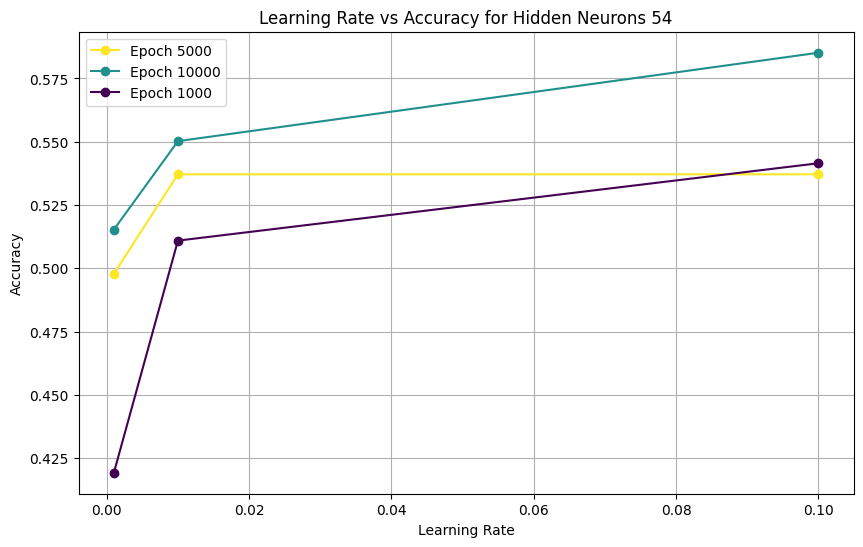

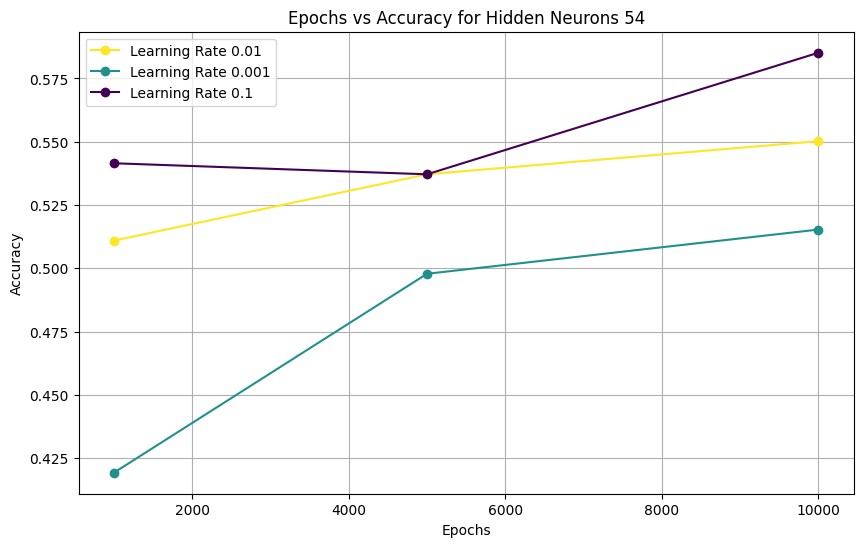

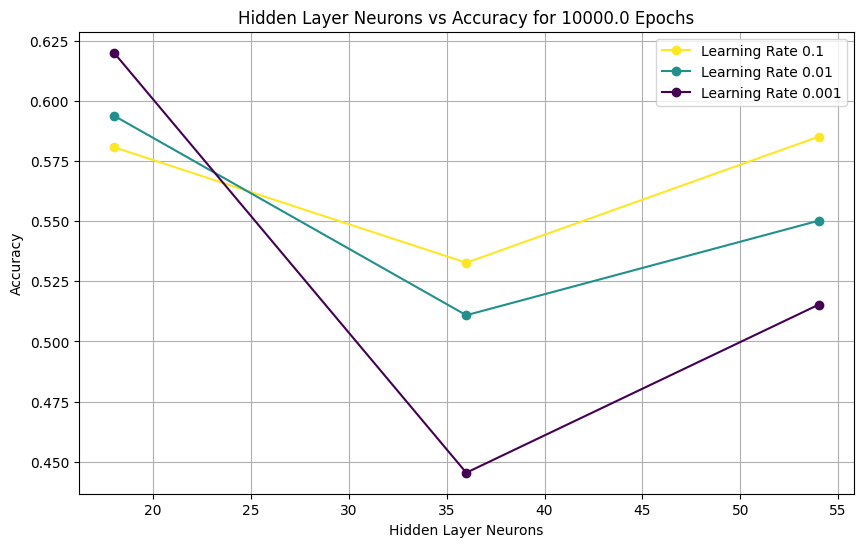

Error in callback <function _WandbInit._pause_backend at 0x7fe8e715e9d0> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [6]:
hidden_layer_size = 54
df = df.sort_values(by='Learning Rate', ascending=False)
# Filter the DataFrame to include only rows with the specified hidden layer size
df_filtered = df[df['Hidden Layer Neurons'] == hidden_layer_size]

# Create a line plot showing learning rate vs accuracy for different epochs
plt.figure(figsize=(10, 6))
colors = iter(plt.cm.viridis_r(np.linspace(0, 1, len(df_filtered['Epochs'].unique()))))

for epoch in df_filtered['Epochs'].unique():
    data = df_filtered[df_filtered['Epochs'] == epoch]
    plt.plot(data['Learning Rate'], data['Accuracy'], marker='o', label=f'Epoch {epoch}', color=next(colors))

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title(f'Learning Rate vs Accuracy for Hidden Neurons {hidden_layer_size}')
plt.legend()
plt.grid()
plt.show()

# Filter the DataFrame to include only rows with the specified hidden layer size
df = df.sort_values(by='Epochs', ascending=False)
df_filtered = df[df['Hidden Layer Neurons'] == hidden_layer_size]

# Create a line plot showing epochs vs accuracy for different learning rates
plt.figure(figsize=(10, 6))
colors = iter(plt.cm.viridis_r(np.linspace(0, 1, len(df_filtered['Learning Rate'].unique()))))

for learning_rate in df_filtered['Learning Rate'].unique():
    data = df_filtered[df_filtered['Learning Rate'] == learning_rate]
    plt.plot(data['Epochs'], data['Accuracy'], marker='o', label=f'Learning Rate {learning_rate}', color=next(colors))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Epochs vs Accuracy for Hidden Neurons {hidden_layer_size}')
plt.legend()
plt.grid()
plt.show()

# Filter the DataFrame to include only rows with the specified epoch
df = df.sort_values(by='Hidden Layer Neurons', ascending=False)
df_filtered = df[df['Epochs'] == 10000]

# Create a line plot showing hidden layer neurons vs accuracy for different learning rates
plt.figure(figsize=(10, 6))
colors = iter(plt.cm.viridis_r(np.linspace(0, 1, len(df_filtered['Learning Rate'].unique()))))

for learning_rate in df_filtered['Learning Rate'].unique():
    data = df_filtered[df_filtered['Learning Rate'] == learning_rate]
    plt.plot(data['Hidden Layer Neurons'], data['Accuracy'], marker='o', label=f'Learning Rate {learning_rate}', color=next(colors))

plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Accuracy')
plt.title(f'Hidden Layer Neurons vs Accuracy for {df_filtered.iloc[0]["Epochs"]} Epochs')
plt.legend()
plt.grid()
plt.show()



# Evaluating Model

Initial Loss 3.6535756753070365


Iteration 1000: loss = 0.924339
Iteration 2000: loss = 0.912707
Iteration 3000: loss = 0.922208
Iteration 4000: loss = 0.949551
Iteration 5000: loss = 0.987984
Iteration 6000: loss = 1.027672
Iteration 7000: loss = 1.063092
Iteration 8000: loss = 1.091724
Iteration 9000: loss = 1.114372
Iteration 10000: loss = 1.133548
Operation terminated successfully.
         Iterations: 10000
         Final loss function: 1.133548


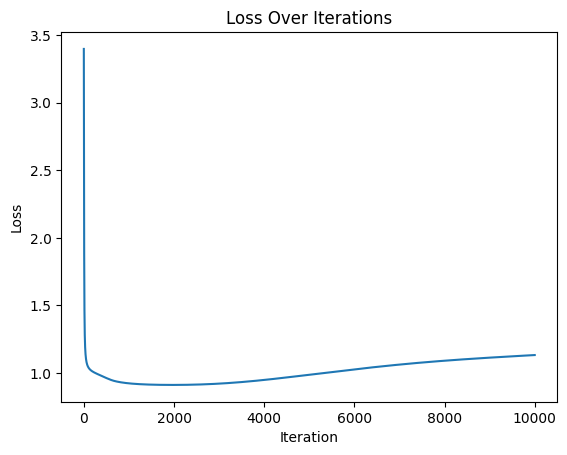

------------------------------------
Testing Data Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         9
           2       0.61      0.71      0.66        97
           3       0.52      0.59      0.55        93
           4       0.40      0.15      0.22        26
           5       0.00      0.00      0.00         4

   micro avg       0.56      0.56      0.56       229
   macro avg       0.25      0.24      0.24       229
weighted avg       0.51      0.56      0.53       229
 samples avg       0.56      0.56      0.56       229

Test Dataset
Test Accuracy: 0.5590


In [55]:
NN.set_activation_type('sigmoid')
NN.set_learning_rate(0.001)
NN.set_epochs(10000)
NN.set_optimizer_type('mini')
LR = 0.001
Max_iterations = 10000
np.random.seed(27)
loss = NN.train_function(X=X_train_std, y=y_train, learning_rate=LR, max_iterations=Max_iterations)
y_pred = NN.predict(X_test_std)
print('------------------------------------')
print("Testing Data Report:")
print(classification_report(y_test, y_pred,zero_division=0))
print("Test Dataset")
testing_accuracy =  accuracy_score(y_test,y_pred)
print(f"Test Accuracy: {testing_accuracy:.4f}")


# Comparative Analysis of Multinomial Logistic Regression and Multilayer Perceptron Classification

## Introduction
```
This report presents a detailed comparative analysis of Multinomial Logistic Regression (MLR) and Multilayer Perceptron Classification (MLP) based on their respective accuracy scores. The accuracies achieved by these models on a machine learning task were 0.5721 for MLR and 0.5590 for MLP.
```
## Accuracy Comparison
```
Accuracy, a fundamental performance metric in classification tasks, measures the proportion of correctly predicted instances out of the total instances. In this analysis, we focus on the following aspects of the accuracy comparison:
```
### 1. Model Performance
```
- Multinomial Logistic Regression (MLR) achieved an accuracy of 0.5721. This indicates that the model correctly classified approximately 57.21% of the instances in the dataset.
- Multilayer Perceptron Classification (MLP), on the other hand, achieved an accuracy of 0.5590, meaning it correctly classified approximately 55.90% of the instances.
```
### 2. Implications of Accuracy Scores
```
The comparison of these accuracy scores provides insights into the relative performance of the two models. While MLR outperformed MLP in terms of accuracy, it is important to delve deeper into the technical aspects of these models to gain a better understanding of why this difference in performance exists.
```
## Technical Analysis

### Model Complexity
```
- MLR is a linear classification model. It assumes linear decision boundaries and relies on feature weights to make predictions.
- MLP is a neural network-based model with multiple hidden layers. It can capture non-linear relationships between features and targets.
```
### Feature Engineering
```
- MLR relies heavily on feature engineering. The quality of input features significantly impacts its performance.
- MLP can automatically learn hierarchical features. Feature engineering is still beneficial but not as critical.
```
### Interpretability
```
- MLR provides straightforward model interpretability. We can directly interpret the weights as feature importance.
- MLP's complex architecture makes it challenging to directly interpret the feature importance, as it involves non-linear transformations of the input data.
```
### Training Time
```
- MLR generally requires less training time. It is efficient in handling large datasets.
- MLP, especially deep architectures, can be time-consuming to train due to the complexity of neural networks.
```
### Handling Non-Linearity
```
- MLR is limited in its ability to capture non-linear relationships, making it less suitable for tasks with complex, non-linear dependencies.
- MLP excels at capturing non-linear patterns, making it a strong choice for tasks where non-linearity is prevalent.
```
## Conclusion
```
In conclusion, while MLR exhibited a slightly higher accuracy in the specific task at hand, this comparison showcases that the choice between these two models is highly dependent on the problem characteristics, data quality, and desired model complexity.

- Multinomial Logistic Regression is a preferable choice when the data exhibits linear relationships, and model interpretability is essential. It is particularly useful for well-engineered, linear problems.

- Multilayer Perceptron Classification is the model of choice for complex tasks where non-linear relationships dominate. It offers flexibility in modeling but may require more data and computational resources for training.

The accuracy comparison is just one aspect of model evaluation, and making the final model selection should consider other factors like interpretability, training time, and the nature of the data. In this specific task, MLR yielded a slightly higher accuracy, but the choice between these models should be made based on the specific characteristics and requirements of the problem at hand.
```

# Multiperceptron MultiLabel Classification

In [3]:
from scipy.special import expit
from sklearn.preprocessing import MultiLabelBinarizer
data = pd.read_csv('advertisement.csv')
print(data.to_string(index=False))
data.dropna()
print(data.shape)
print(data.head())
print(data.info())
print(list(data.columns))

data_labels = np.array(data['labels'])
values, counts = np.unique(data_labels, return_counts=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 60))
plt.barh(values, counts)
plt.xlabel('Frequency')
plt.ylabel('Label')
plt.title('Distribution of Labels')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['purchase_amount'], alpha=0.5)
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.tight_layout()
plt.show()

correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.tight_layout()
plt.show()




 age gender       income   education  married  children                  city  occupation  purchase_amount most bought item                                                labels
  45   Male 61271.953359      Master    False         3           Lake Sheila      Doctor        87.697118          monitor                           electronics clothing sports
  24 Female 53229.101074 High School    False         1          Crystalburgh Businessman       115.135586         lipstick                                      furniture beauty
  45 Female 30066.046684    Bachelor     True         3         Margaretburgh    Engineer       101.694559         biscuits                      clothing electronics food sports
  19   Male 48950.246384         PhD    False         0         Williamshaven      Lawyer        97.964887            maggi                                                  food
  29 Female 44792.627094      Master    False         0              New Paul Businessman        86.847281    

In [4]:
data.dropna(inplace=True)
categorical_features = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']
numerical_features = ['age', 'income', 'children', 'purchase_amount']
target_columns = ['labels']
one_hot_encoding = pd.get_dummies(data,columns=categorical_features,drop_first=True)
X = one_hot_encoding.drop('labels',axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
print('shape',X.shape)
print("X",X)
y = one_hot_encoding['labels']
mlb = MultiLabelBinarizer()
y_binary = (mlb.fit_transform(y.str.split(' ')))
print(y_binary)
y_new = []
for i in range(y_binary.shape[0]):
    if np.sum(y_binary[i]) > 0:
        y_new.append(y_binary[i]/np.sum(y_binary[i]))
y_binary = np.array(y_new)
print(np.array(y_binary))
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binary, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
indices = (y_val > 0)
# print(indices)
y_val[indices] = 1
# print(y_val)
indices = (y_test > 0)
y_test[indices] = 1
print(y_test.shape)

shape (1000, 1010)
X [[ 0.3021781   1.20553316  1.32188909 ... -0.22207644 -0.16012815
  -0.20938323]
 [-1.22177485  0.3922638  -0.4500802  ... -0.22207644 -0.16012815
  -0.20938323]
 [ 0.3021781  -1.94991553  1.32188909 ... -0.22207644 -0.16012815
  -0.20938323]
 ...
 [ 1.68099267  1.96072458 -1.33606484 ... -0.22207644 -0.16012815
  -0.20938323]
 [-1.65718998 -0.50572162 -1.33606484 ... -0.22207644 -0.16012815
  -0.20938323]
 [ 1.46328511 -1.03035349 -1.33606484 ... -0.22207644 -0.16012815
  -0.20938323]]
[[0 0 1 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
[[0.         0.         0.33333333 ... 0.         0.         0.33333333]
 [0.5        0.         0.         ... 0.5        0.         0.        ]
 [0.         0.         0.25       ... 0.         0.         0.25      ]
 ...
 [0.         0.         0.5        ... 0.         0.         0.5       ]
 [1.         0.         0.         ... 0.         0.         0.       

In [5]:
# Multiperceptron MultiLabel Classification
import numpy as np
import matplotlib.pyplot as plt

class MultiLabelPerceptronClassification:
    def __init__(self, input_layer_size, num_hidden_layers, hidden_layer_size, output_layer_size, learning_rate=0.001, activation_type='sigmoid', optimizer_type='batch',max_iterations=10000):
        self.learning_rate = learning_rate
        self.input_layer_size = input_layer_size
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size
        self.activation_type = activation_type
        self.optimizer_type = optimizer_type
        self.weights = self.initialize_weights()
        self.yHat = None
        self.activation_function = self.sigmoid
        self.activation_prime_function = self.sigmoid_prime
        self.max_iterations = max_iterations
        self.train_function = self.train_sgd
        self.wandlog = False

    def initialize_weights(self):
        weights = []
        layer_sizes = [self.input_layer_size] + [self.hidden_layer_size] * self.num_hidden_layers + [self.output_layer_size]
        for i in range(1, len(layer_sizes)):
            weights.append(np.random.randn(layer_sizes[i - 1], layer_sizes[i]))
        return weights

    def sigmoid(self, z):
        return expit(z)

    def sigmoid_prime(self, z):
        out = self.sigmoid(z)
        return out * (1 - out)
    
    def tanh(self, z):
        return np.tanh(z)

    def tanh_prime(self, z):
        return 1 - np.square(np.tanh(z))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_prime(self, z):
        return (z > 0).astype(int)

    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_activation_type(self, activation_type):
        self.activation_type = activation_type
        self.set_activation_function()

    def set_optimizer_type(self, optimizer_type):
        self.optimizer_type = optimizer_type
        self.set_train_function()

    def set_activation_function(self):
        if self.activation_type == 'sigmoid':
            self.activation_function = self.sigmoid
            self.activation_prime_function = self.sigmoid_prime
        elif self.activation_type == 'relu':
            self.activation_function = self.relu
            self.activation_prime_function = self.relu_prime
        elif self.activation_type == 'tanh':
            self.activation_function = self.tanh
            self.activation_prime_function = self.tanh_prime

    def set_train_function(self):
        if self.optimizer_type == 'SGD':
            self.train_function = self.train_sgd
        elif self.optimizer_type == 'mini':
            self.train_function = self.train_mini_batch
        elif self.optimizer_type == 'batch':
            self.train_function = self.train_batch

    def set_hidden_layers(self,num_hidden_layers,hidden_layer_size):
        self.num_hidden_layers = num_hidden_layers
        self.hidden_layer_size = hidden_layer_size
        self.weights = self.initialize_weights()

    def set_epochs(self,epochs):
        self.max_iterations = epochs

    def set_wandb(self,state):
        self.wandlog = state

    def forward_propagation(self, X):
        A = [X]
        Z = []
        for layer in range(0, self.num_hidden_layers):
            z = np.dot(A[layer], self.weights[layer])
            a = self.activation_function(z)
            Z.append(z)
            A.append(a)
        z = np.dot(A[self.num_hidden_layers],self.weights[self.num_hidden_layers])
        Z.append(z)
        self.yHat = self.softmax(Z[-1])
        A.append(self.yHat)
        self.activations = A
        self.weighted_sums = Z
        return self.yHat

    def backward_propagation(self, x, y):
        m = x.shape[0]
        output_error = np.multiply((self.activations[-1] - y),self.sigmoid_prime(self.weighted_sums[-1]))
        deltas = [output_error]
        for i in reversed(range(self.num_hidden_layers)):
            error = deltas[-1].dot(self.weights[i + 1].T)
            delta = error*self.activation_prime_function(self.weighted_sums[i])
            deltas.append(delta)
        deltas = list(reversed(deltas))
        gradients = []
        for i in range(self.num_hidden_layers + 1):
            gradient = self.activations[i].T.dot(deltas[i])
            gradients.append(gradient)
        return gradients
    

    def softmax(self, z):
        max_z = np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z - max_z)
        return exp_z / exp_z.sum(axis=1, keepdims=True)
    
    def costFunction(self, X, y):
        epsilon = 1e-15
        self.y_Hat = self.forward_propagation(X)
        J = -np.sum(y*np.log(self.y_Hat+epsilon))/(len(X)+epsilon)
        return J

    def get_params(self):
        params = []
        for weight_matrix in self.weights:
            params.append(weight_matrix.ravel())
        return np.concatenate(params)

    def set_params(self, params):
        param_start = 0
        for i in range(len(self.weights)):
            weight_shape = self.weights[i].shape
            weight_size = weight_shape[0] * weight_shape[1]
            self.weights[i] = params[param_start:param_start + weight_size].reshape(weight_shape)
            param_start += weight_size

    def compute_gradients(self, X, y):
        self.forward_propagation(X)
        gradients = self.backward_propagation(X, y)
        gradient_params = []
        for weight_gradient in gradients:
            gradient_params.append(weight_gradient.ravel())
        return np.concatenate(gradient_params)

    def train_batch(self, X, y, learning_rate=0.01, max_iterations=10000,show=False):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        loss = self.costFunction(X, y)
        print('Initial Loss',loss)
        # wandb.log({"Batch-loss": loss})
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (loss > 1e-5) and (k < maxiter):
            gradients = self.compute_gradients(X, y)
            loss = self.costFunction(X, y)
            self.J.append(loss)
            self.set_params(self.get_params() - lr * gradients)
            k += 1
            if k % 250 == 0 and show==True:
                print("Epoch %d: loss = %f" % (k, loss))
                wandb.log({"loss": loss,"epoch":k})
        print("Operation Batch GD terminated successfully.")
        print("---------Iterations: %d" % k)
        print("---------Final loss function: %f" % loss)
        if show==True:
            wandb.log({"loss": loss,"epoch":k})
            self.plot_loss()
        return loss
    
    def train_sgd(self, X, y,learning_rate=0.01,max_iterations=10000,show=False):
        self.J = []
        self.set_learning_rate(learning_rate)
        self.set_epochs(max_iterations)
        k = 0
        for epoch in range(max_iterations):
                np.random.seed(42)
                idx = np.random.randint(len(X))
                np.random.seed(27)
                loss = self.costFunction(X[idx:idx+1],y[idx:idx+1])
                self.J.append(loss)
                gradients = self.compute_gradients(X[idx:idx+1], y[idx:idx+1])
                self.set_params(self.get_params() - self.learning_rate * gradients)
                k+=1
                if (epoch % 250 == 0 and show==True):
                    print("Epoch %d: loss = %f" % (epoch, loss))
                    wandb.log({"loss": loss,"epoch":epoch})
        print("Operation SGD terminated successfully.")
        print("         Iterations: %d" % k)
        print("         Final loss function: %f" % loss)
        if show==True:
            wandb.log({"loss": loss,"epoch":k})
            self.plot_loss()
        return loss
    
    def train_mini_batch(self, X, y, learning_rate=0.01, max_iterations=10000, batch_size=32,show=False):
        self.J = []
        self.set_epochs(max_iterations)
        self.set_learning_rate(learning_rate)
        loss = self.costFunction(X, y)
        print('Initial Loss', loss)
        k = 0
        maxiter = max_iterations
        lr = learning_rate
        while (loss > 1e-5) and (k < maxiter):
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            for j in range(0, len(X), batch_size):
                batch_indices = indices[j:j+batch_size]
                gradients = self.compute_gradients(X[batch_indices], y[batch_indices])
                self.set_params(self.get_params() - lr * gradients)
            k += 1
            loss = self.costFunction(X, y)
            self.J.append(loss)
            if k % 250 == 0 and show==True:
                print("Iteration %d: loss = %f" % (k, loss))
                wandb.log({"loss": loss,"epoch":k})
        print("Operation terminated successfully.")
        print("         Iterations: %d" % k)
        print("         Final loss function: %f" % loss)
        if show==True:
            wandb.log({"loss": loss,"epoch":k})
            self.plot_loss()
        return loss

    def plot_loss(self):
        if not self.J:
            print("Loss array is empty")
        else:
            plt.plot(self.J)
            plt.title('Loss Over Iterations')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()

    def predict(self, X):
        yHat = self.forward_propagation(X)
        # print(np.sum(yHat,axis=1))
        binary_predictions = (yHat>0.2).astype(int)
        return binary_predictions


LR = 0.01
Max_iterations = 100
np.random.seed(27)
NN = MultiLabelPerceptronClassification(input_layer_size=1010, num_hidden_layers=1, hidden_layer_size=1000,output_layer_size=8, learning_rate=LR, activation_type='sigmoid', optimizer_type='SGD')
loss = NN.train_function(X=X_train, y=y_train, learning_rate=LR, max_iterations=Max_iterations,show=True)

In [105]:
np.random.seed(27)
indices = (y_train > 0)
y_train_binary = y_train
y_train_binary[indices] = 1
y_pred = NN.predict(X_val)
print(y_pred)
print('------------------------------------')
validation_set_accuracy = 1-hamming_loss(y_val,y_pred)
print("Validation set Accuracy",validation_set_accuracy)
# wandb.log({"Loss": loss,"validation_set_accuracy": validation_set_accuracy})
print("Classification Report on Validation Dataset:")
tuples = []
tuples.append((1-hamming_loss(y_val,y_pred),recall_score(y_val,y_pred,average='macro',zero_division=0),precision_score(y_val,y_pred,average='macro',zero_division=0),f1_score(y_val,y_pred,average='macro',zero_division=0),f1_score(y_val,y_pred,average='micro',zero_division=0)))
filtered_df = pd.DataFrame(tuples, columns=['Accuracy', 'Recall', 'Precision', 'F1_macro','F1_micro'])
print(filtered_df.to_string(index=False))
print('------------------------------------')
y_pred = NN.predict(X_train)
training_set_accuracy = 1-hamming_loss(y_train_binary,y_pred)
print("Train set Accuracy",training_set_accuracy)
# wandb.log({"Loss": loss,"validation_set_accuracy": training_set_accuracy})
print("Classification Report on Training Dataset:")
# print('Accuracy:',accuracy_score(y_train,y_pred))
# print('Recall:',recall_score(y_train,y_pred,average='macro',zero_division=0))
# print('Precision:',precision_score(y_train,y_pred,average='macro',zero_division=0))
# print('F1_macro_score:',f1_score(y_train,y_pred,average='macro',zero_division=0))
# print('F1_micro_score:',f1_score(y_train,y_pred,average='micro',zero_division=0))
tuples = []
tuples.append((1-hamming_loss(y_train_binary,y_pred),recall_score(y_train_binary,y_pred,average='macro',zero_division=0),precision_score(y_train_binary,y_pred,average='macro',zero_division=0),f1_score(y_train_binary,y_pred,average='macro',zero_division=0),f1_score(y_train_binary,y_pred,average='micro',zero_division=0)))
filtered_df = pd.DataFrame(tuples, columns=['Accuracy', 'Recall', 'Precision', 'F1_macro','F1_micro'])
print(filtered_df.to_string(index=False))
print('------------------------------------')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
------------------------------------
Validation set Accuracy 0.6287499999999999
Classification Report on Validation Dataset:
 Accuracy   Recall  Precision  F1_macro  F1_micro
  0.62875 0.129011   0.239095  0.106546  0.197297
------------------------------------
[1. 1. 1

In [120]:
LR = 0.1
Max_iterations = 50
activation_functions = ['sigmoid', 'tanh', 'relu']
optimizers = ['SGD', 'batch', 'mini']
results = []
np.random.seed(27)
model = MultiLabelPerceptronClassification(input_layer_size=1010, num_hidden_layers=1, hidden_layer_size=1000, output_layer_size=8, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
for activation in activation_functions:
    for optimizer in optimizers:
        np.random.seed(27)  # Set a random seed for reproducibility
        model.set_activation_type(activation)
        model.set_optimizer_type(optimizer)
        loss = model.train_function(X=X_train, y=y_train, learning_rate=LR, max_iterations=Max_iterations)
        y_pred = model.predict(X_val)
        accuracy = 1-hamming_loss(y_val, y_pred)
        recall = recall_score(y_val, y_pred, average='weighted',zero_division=0)
        precision = precision_score(y_val, y_pred, average='weighted',zero_division=0)
        f1 = f1_score(y_val, y_pred, average='weighted',zero_division=0)
        # results[(activation, optimizer)] = (loss,accuracy, recall, precision, f1)
        result = {
            'Activation': activation,
            'Optimizer': optimizer,
            'Accuracy': accuracy,
            'Recall': recall,
            'Precision': precision,
            'F1 Score': f1
        }
        results.append(result)

df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
# Print the DataFrame
print(df.to_string(index=False))

KeyboardInterrupt: 

In [6]:
import wandb
wandb.init(project="MLP-Classification-Label-Activation")
LR = 0.1
Max_iterations = 50
activation_functions = ['sigmoid', 'tanh', 'relu']
optimizers = ['SGD', 'batch', 'mini']
results = []
np.random.seed(27)
model = MultiLabelPerceptronClassification(input_layer_size=1010, num_hidden_layers=1, hidden_layer_size=1000, output_layer_size=8, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
sweep_config = {
    "method": "grid",
    "name": "MLP-Classification-Label-Activation",
    "metric": {"goal": "maximize", "name": "Accuracy"},
    "parameters": {
        "activation": {"values": ['sigmoid', 'tanh', 'relu']},
        "optimizer": {"values": ['SGD', 'batch', 'mini']},
    },
}
sweep_id = wandb.sweep(sweep_config, project="MLP-Classification-Label-Activation")
def train():
    wandb.init(project="MLP-Classification-Label-Activation")
    config = wandb.config
    activation = config.activation
    optimizer = config.optimizer
    np.random.seed(27)  # Set a random seed for reproducibility
    model.set_activation_type(activation)
    model.set_optimizer_type(optimizer)
    loss = model.train_function(X=X_train, y=y_train, learning_rate=LR, max_iterations=Max_iterations)
    y_pred = model.predict(X_val)
    accuracy = 1-hamming_loss(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='weighted',zero_division=0)
    precision = precision_score(y_val, y_pred, average='weighted',zero_division=0)
    f1 = f1_score(y_val, y_pred, average='weighted',zero_division=0)
    # results[(activation, optimizer)] = (loss,accuracy, recall, precision, f1)
    result = {
        'Activation': activation,
        'Optimizer': optimizer,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
        }
    results.append(result)
    wandb.log({"Activation": activation, "Optimizer": optimizer,'Accuracy': accuracy,'Recall': recall,'Precision': precision,'F1 Score': f1})

# Run the sweep
wandb.agent(sweep_id, function=train)
df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
# Print the DataFrame
print(df.to_string(index=False))
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: rohitgowlapalli01. Use `wandb login --relogin` to force relogin


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: p4alcn2i
Sweep URL: https://wandb.ai/rohitgowlapalli01/MLP-Classification-Label-Activation/sweeps/p4alcn2i
<IPython.core.display.HTML object>


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


wandb: Agent Starting Run: yk0kuddt with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread     IntMsgThrself.run()    :

self.run()Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 870, in run

  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
  File "/usr/lib/python3.8/threading.py", line 870, in run
        self._target(*self._args, **self._kwargs)self._target(*self._args, **self._kwargs)
    
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 267, in check_network_status
self.run()  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 285, in check_stop_status

  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._loop_check_status(
  File "/h

Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.62875
Activation,sigmoid
F1 Score,0.11222
Optimizer,SGD
Precision,0.25143
Recall,0.13645


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7n8bkgkr with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 26.389147688957205


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.6225
Activation,sigmoid
F1 Score,0.18126
Optimizer,batch
Precision,0.34113
Recall,0.14393


wandb: Agent Starting Run: 629v8io4 with config:
wandb: 	activation: sigmoid
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 19.719644673441934


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.62312
Activation,sigmoid
F1 Score,0.18155
Optimizer,mini
Precision,0.3416
Recall,0.14393


wandb: Agent Starting Run: ipnu8htq with config:
wandb: 	activation: tanh
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.61688
Activation,tanh
F1 Score,0.17959
Optimizer,SGD
Precision,0.31895
Recall,0.12523


wandb: Agent Starting Run: ekv9cl4b with config:
wandb: 	activation: tanh
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 24.455184680783574


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.61938
Activation,tanh
F1 Score,0.18227
Optimizer,batch
Precision,0.32526
Recall,0.1271


wandb: Agent Starting Run: ar2x9xts with config:
wandb: 	activation: tanh
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 22.35257967405718


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.61813
Activation,tanh
F1 Score,0.17964
Optimizer,mini
Precision,0.32089
Recall,0.12523


wandb: Agent Starting Run: 7wtduf0l with config:
wandb: 	activation: relu
wandb: 	optimizer: SGD
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.62312
Activation,relu
F1 Score,0.17327
Optimizer,SGD
Precision,0.35537
Recall,0.12336


wandb: Agent Starting Run: f93fgy0s with config:
wandb: 	activation: relu
wandb: 	optimizer: batch
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 29.962117207132106


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.63
Activation,relu
F1 Score,0.17018
Optimizer,batch
Precision,0.36807
Recall,0.13458


wandb: Agent Starting Run: w3iiefs8 with config:
wandb: 	activation: relu
wandb: 	optimizer: mini
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Initial Loss 30.235013186182357


Accuracy,▁
F1 Score,▁
Precision,▁
Recall,▁
Accuracy,0.63
Activation,relu
F1 Score,0.17018
Optimizer,mini
Precision,0.36807
Recall,0.13458


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Activation Optimizer  Accuracy   Recall  Precision  F1 Score
      relu     batch  0.630000 0.134579   0.368073  0.170178
      relu      mini  0.630000 0.134579   0.368073  0.170178
   sigmoid       SGD  0.628750 0.136449   0.251433  0.112217
   sigmoid      mini  0.623125 0.143925   0.341598  0.181552
      relu       SGD  0.623125 0.123364   0.355369  0.173274
   sigmoid     batch  0.622500 0.143925   0.341135  0.181258
      tanh     batch  0.619375 0.127103   0.325263  0.182271
      tanh      mini  0.618125 0.125234   0.320889  0.179644
      tanh       SGD  0.616875 0.125234   0.318945  0.179587
Error in callback <function _WandbInit._pause_backend at 0x7fc9aba8c550> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

In [136]:
LR = 0.0001
Max_iterations = 5000
learning_rates = [0.01,0.05,0.10]
epochs = [10, 50, 100]
hidden_layer_neurons = [[1,1000],[3, 500],[2,1000]]
results = []
model = MultiLabelPerceptronClassification(input_layer_size=1010, num_hidden_layers=1, hidden_layer_size=1000, output_layer_size=8, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
model.set_activation_type('relu')
model.set_optimizer_type('SGD')
for rate in learning_rates:
    for epoch in epochs:
        for hln in hidden_layer_neurons:
            np.random.seed(27)
            model.set_learning_rate(rate)
            model.set_epochs(epoch)
            model.set_hidden_layers(num_hidden_layers=hln[0],hidden_layer_size=hln[1])
            loss = model.train_function(X_train, y_train, learning_rate=rate, max_iterations=epoch)
            y_pred = model.predict(X_val)
            accuracy = 1-hamming_loss(y_val, y_pred)
            recall = recall_score(y_val, y_pred, average='macro',zero_division=0)
            precision = precision_score(y_val, y_pred, average='macro',zero_division=0)
            f1 = f1_score(y_val, y_pred, average='macro',zero_division=0)
            results.append({
                'Learning Rate': rate,
                'Epochs': epoch,
                'Hidden Layer Neurons': hln[0]*hln[1],
                'Loss':loss,
                'Accuracy': accuracy,
                'Recall': recall,
                'Precision': precision,
                'F1 Score': f1
            })


df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
print("Hyperparameter Tuning Results:")
print(df.to_string(index=False))
best_params = df.iloc[0].to_dict()
print("\nBest Model Parameters:")
print(best_params)

Hyperparameter Tuning Results:
 Learning Rate  Epochs  Hidden Layer Neurons      Loss  Accuracy   Recall  Precision  F1 Score
          0.01      10                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.10     100                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.01      50                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.10      50                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.01     100                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.10      10                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.05      10                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.05     100                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.05      50                  1000 69.077553  0.640625 0.143352   0.308026  0.144165
          0.05     

In [6]:
import wandb
wandb.init(project="MLP-Classification-Label-Epoch")
LR = 0.0001
Max_iterations = 5000
learning_rates = [0.01,0.05,0.10]
epochs = [10, 50, 100]
hidden_layer_neurons = [[1,1000],[3, 1000],[2,1000]]
results = []
model = MultiLabelPerceptronClassification(input_layer_size=1010, num_hidden_layers=1, hidden_layer_size=1000, output_layer_size=8, learning_rate=LR, activation_type='sigmoid', optimizer_type='batch')
model.set_activation_type('relu')
model.set_optimizer_type('SGD')
sweep_config = {
    "method": "grid",
    "name": "MLP-Classification-Label-Epoch",
    "metric": {"goal": "maximize", "name": "Accuracy"},
    "parameters": {
        "rate": {"values": [0.01,0.05,0.10]},
        "epoch": {"values": [10, 50, 100]},
        "hln":{"values":[1000,2000,3000]}
    },
}
sweep_id = wandb.sweep(sweep_config, project="MLP-Classification-Label-Epoch")
def train():
    wandb.init(project="MLP-Classification-Label-Epoch")
    config = wandb.config
    rate = config.rate
    hln = int(config.hln)
    epoch = int(config.epoch)
    np.random.seed(27)
    model.set_learning_rate(rate)
    model.set_epochs(epoch)
    model.set_hidden_layers(num_hidden_layers=int(hln/1000),hidden_layer_size=hln)
    loss = model.train_function(X_train, y_train, learning_rate=rate, max_iterations=epoch)
    y_pred = model.predict(X_val)
    accuracy = 1-hamming_loss(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='macro',zero_division=0)
    precision = precision_score(y_val, y_pred, average='macro',zero_division=0)
    f1 = f1_score(y_val, y_pred, average='macro',zero_division=0)
    results.append({
        'Learning Rate': rate,
        'Epochs': epoch,
        'Hidden Layer Neurons': hln,
        'Loss':loss,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    })
    wandb.log({"Learning Rate": rate, "Epochs": epoch,"Hidden Layer Neurons":hln,'Loss':loss,'Accuracy': accuracy,'Recall': recall,'Precision': precision,'F1 Score': f1})

# Run the sweep
wandb.agent(sweep_id, function=train)
df = pd.DataFrame(results)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
print("Hyperparameter Tuning Results:")
print(df.to_string(index=False))
best_params = df.iloc[0].to_dict()
print("\nBest Model Parameters:")
print(best_params)
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: rohitgowlapalli01. Use `wandb login --relogin` to force relogin


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: g6ieu87d
Sweep URL: https://wandb.ai/rohitgowlapalli01/MLP-Classification-Label-Epoch/sweeps/g6ieu87d
<IPython.core.display.HTML object>


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


wandb: Agent Starting Run: 8es0qo98 with config:
wandb: 	epoch: 10
wandb: 	hln: 1000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Exception in thread ChkStopThrException in thread :
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()IntMsgThr    :
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 299, in check_internal_messages
    self._loop_check_status(
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 223, in _loop_check_status
    local_handle = request()
  File "/home/rohit172/.local/lib/python3.8/site-packages/wandb/sdk/interface/interface.py", line 743, in deliver_internal_messages

self.run()
  File "/

Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,10
F1 Score,0.14417


wandb: Agent Starting Run: rgcbt44b with config:
wandb: 	epoch: 10
wandb: 	hln: 1000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,10
F1 Score,0.14417


wandb: Agent Starting Run: 4qdv680b with config:
wandb: 	epoch: 10
wandb: 	hln: 1000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,10
F1 Score,0.14417


wandb: Agent Starting Run: a39n4hxr with config:
wandb: 	epoch: 10
wandb: 	hln: 2000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,10
F1 Score,0.17318


wandb: Agent Starting Run: magx2hq6 with config:
wandb: 	epoch: 10
wandb: 	hln: 2000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,10
F1 Score,0.17318


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5ttqee51 with config:
wandb: 	epoch: 10
wandb: 	hln: 2000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,10
F1 Score,0.17318


wandb: Agent Starting Run: g2wxcvys with config:
wandb: 	epoch: 10
wandb: 	hln: 3000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,10
F1 Score,0.17749


wandb: Agent Starting Run: jmvao6em with config:
wandb: 	epoch: 10
wandb: 	hln: 3000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,10
F1 Score,0.17749


wandb: Agent Starting Run: 3z0tp5l7 with config:
wandb: 	epoch: 10
wandb: 	hln: 3000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,10
F1 Score,0.17749


wandb: Agent Starting Run: nkddjd1m with config:
wandb: 	epoch: 50
wandb: 	hln: 1000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,50
F1 Score,0.14417


wandb: Agent Starting Run: gnt99tnw with config:
wandb: 	epoch: 50
wandb: 	hln: 1000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,50
F1 Score,0.14417


wandb: Agent Starting Run: m1tcwewq with config:
wandb: 	epoch: 50
wandb: 	hln: 1000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,50
F1 Score,0.14417


wandb: Agent Starting Run: xnwm5sja with config:
wandb: 	epoch: 50
wandb: 	hln: 2000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,50
F1 Score,0.17318


wandb: Agent Starting Run: chxpnqpu with config:
wandb: 	epoch: 50
wandb: 	hln: 2000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,50
F1 Score,0.17318


wandb: Agent Starting Run: ocruytfl with config:
wandb: 	epoch: 50
wandb: 	hln: 2000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,50
F1 Score,0.17318


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 54xqf6q5 with config:
wandb: 	epoch: 50
wandb: 	hln: 3000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,50
F1 Score,0.17749


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: envftg17 with config:
wandb: 	epoch: 50
wandb: 	hln: 3000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,50
F1 Score,0.17749


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: dpx5bplc with config:
wandb: 	epoch: 50
wandb: 	hln: 3000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,50
F1 Score,0.17749


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3w5aa8iz with config:
wandb: 	epoch: 100
wandb: 	hln: 1000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,100
F1 Score,0.14417


wandb: Agent Starting Run: 73c6seul with config:
wandb: 	epoch: 100
wandb: 	hln: 1000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,100
F1 Score,0.14417


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 55kbjs6h with config:
wandb: 	epoch: 100
wandb: 	hln: 1000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,100
F1 Score,0.14417


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9zs3cy3v with config:
wandb: 	epoch: 100
wandb: 	hln: 2000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,100
F1 Score,0.17318


wandb: Agent Starting Run: 8beo3opo with config:
wandb: 	epoch: 100
wandb: 	hln: 2000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,100
F1 Score,0.17318


wandb: Agent Starting Run: jpa6bwyq with config:
wandb: 	epoch: 100
wandb: 	hln: 2000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.62938
Epochs,100
F1 Score,0.17318


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rka5bdtb with config:
wandb: 	epoch: 100
wandb: 	hln: 3000
wandb: 	rate: 0.01
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,100
F1 Score,0.17749


wandb: Agent Starting Run: je0zr7ym with config:
wandb: 	epoch: 100
wandb: 	hln: 3000
wandb: 	rate: 0.05
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,100
F1 Score,0.17749


wandb: Agent Starting Run: 5aivfhz4 with config:
wandb: 	epoch: 100
wandb: 	hln: 3000
wandb: 	rate: 0.1
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Accuracy,▁
Epochs,▁
F1 Score,▁
Hidden Layer Neurons,▁
Learning Rate,▁
Loss,▁
Precision,▁
Recall,▁
Accuracy,0.64062
Epochs,100
F1 Score,0.17749


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Hyperparameter Tuning Results:
 Learning Rate  Epochs  Hidden Layer Neurons      Loss  Accuracy   Recall  Precision  F1 Score
          0.01      10                  1000 34.538776  0.640625 0.143352   0.308026  0.144165
          0.10      50                  1000 34.538776  0.640625 0.143352   0.308026  0.144165
          0.05     100                  3000 34.538776  0.640625 0.145529   0.459276  0.177489
          0.01     100                  3000 34.538776  0.640625 0.145529   0.459276  0.177489
          0.10     100                  1000 34.538776  0.640625 0.143352   0.308026  0.144165
          0.05     100                  1000 34.538776  0.640625 0.143352   0.308026  0.144165
          0.01     100                  1000 34.538776  0.640625 0.143352   0.308026  0.144165
          0.10      50                  3000 34.538776  0.640625 0.145529   0.459276  0.177489
          0.05      50                  3000 34.538776  0.640625 0.145529   0.459276  0.177489
          0.01     

BrokenPipeError: [Errno 32] Broken pipe

In [8]:
y_pred = NN.predict(X_test)
print(y_pred)
print('------------------------------------')
test_set_accuracy = 1-hamming_loss(y_test,y_pred)
print("Validation set Accuracy",test_set_accuracy)
# wandb.log({"Loss": loss,"validation_set_accuracy": validation_set_accuracy})
print("Classification Report on Validation Dataset:")
tuples = []
tuples.append((1-hamming_loss(y_test,y_pred),recall_score(y_test,y_pred,average='macro',zero_division=0),precision_score(y_test,y_pred,average='macro',zero_division=0),f1_score(y_test,y_pred,average='macro',zero_division=0),f1_score(y_test,y_pred,average='micro',zero_division=0)))
filtered_df = pd.DataFrame(tuples, columns=['Accuracy', 'Recall', 'Precision', 'F1_macro','F1_micro'])
print(filtered_df.to_string(index=False))
print('------------------------------------')

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
------------------------------------
Validation set Accuracy 0.61625
Classification Report on Validation Dataset:
 Accuracy   Recall  Precision  F1_macro  F1_micro
  0.61625 0.113271   0.100397  0.076766  0.156593
------------------------------------
